In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

In [30]:
## LOAd the dataset

max_features= 100000
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_features)

In [31]:
print(f'{X_train.shape},{y_train.shape}')

(25000,),(25000,)


In [32]:
sample_rev=X_train[0]
sample_label=y_train[0]

# print(f"{sample_rev},{sample_label}")

In [33]:
word_ind=imdb.get_word_index()

In [34]:
# word_ind

reverse_word_ind={value: key for key, value in word_ind.items()}

In [35]:
# reverse_word_ind

In [36]:
decoded_review=' '.join([reverse_word_ind.get(i-3,'?') for i in sample_rev])

In [37]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [38]:
max_len=500
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)
X_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [39]:
model=Sequential()
model.add(Embedding(max_features,128,input_length=max_len))
model.add(SimpleRNN(128,activation='tanh'))
model.add(Dense(1,activation="sigmoid"))
model.build(input_shape=(None, 500))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [40]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 500, 128)       │    12,800,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,833,025 (48.95 MB)

 Trainable params: 12,833,025 (48.95 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [42]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=[early_stopping])


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 201ms/step - accuracy: 0.5930 - loss: 0.6537 - val_accuracy: 0.7734 - val_loss: 0.5184
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 187ms/step - accuracy: 0.7698 - loss: 0.4787 - val_accuracy: 0.7520 - val_loss: 0.5333
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.8407 - loss: 0.3674 - val_accuracy: 0.7338 - val_loss: 0.5941
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 189ms/step - accuracy: 0.8948 - loss: 0.2801 - val_accuracy: 0.7512 - val_loss: 0.5776
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 179ms/step - accuracy: 0.9183 - loss: 0.2132 - val_accuracy: 0.7362 - val_loss: 0.6470
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 188ms/step - accuracy: 0.9267 - loss: 0.1980 - val_accuracy: 0.6454 - val_loss: 0.6954


In [15]:
gpus = tf.config.list_physical_devices('GPU')

# Print the number of GPUs available
print("Num GPUs Available: ", len(gpus))

Num GPUs Available:  0


In [43]:
model.save('simple_rnn_imdb.h5')

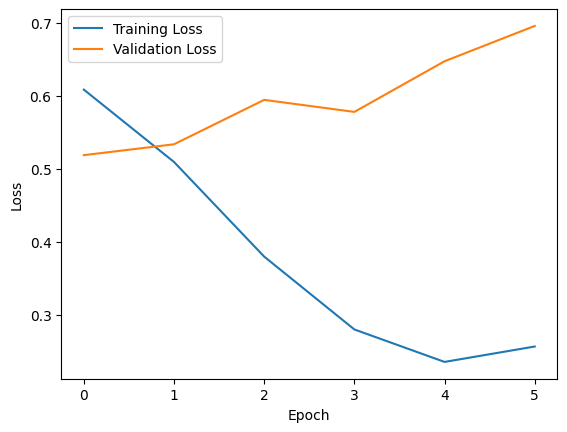

In [44]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()